In [2]:
#My imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
#Declare our dataframe from the dataset
df = pd.read_csv('datasets/train.csv')

#Since there are so many columns I want to see them ALL!!
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Lets preview 10 rows
df.sample(10).to_csv('table.csv', index=False)

In [812]:
#Lets check the data types from each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [813]:
#Lets check the shape of our dataset in order to judge if some columns are worth dropping.
df.shape

(2051, 81)

So, we have 2051 rows and 81 columns, if I have more that 50% values missing I will drop them

In [814]:
#Lets check some null values on ALLL OF THEM!
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [815]:
#I will be deleting the columns that have more than 1000 rows of missing values
df.drop('Alley', axis=1, inplace=True)
df.drop('Pool QC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('Misc Feature', axis=1, inplace=True)
df.drop('Fireplace Qu', axis=1, inplace=True)

In [816]:
#check again for shape if the columns were deleted
df.shape

(2051, 76)

In [817]:
#Now I will populate the rest null values from the other 
#float or int rows with the mean values of each colum
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mean())
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean())
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(df['Bsmt Unf SF'].mean())
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean())
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].mean())
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(df['Bsmt Half Bath'].mean())

In [818]:
#I will populate the object null values with the mode from
#each column
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0])
df['Bsmt Qual'] = df['Bsmt Qual'].fillna(df['Bsmt Qual'].mode()[0])
df['Bsmt Cond'] = df['Bsmt Cond'].fillna(df['Bsmt Cond'].mode()[0])
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna(df['Bsmt Exposure'].mode()[0])
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna(df['BsmtFin Type 1'].mode()[0])
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna(df['BsmtFin Type 2'].mode()[0])
df['Garage Type'] = df['Garage Type'].fillna(df['Garage Type'].mode()[0])
df['Garage Finish'] = df['Garage Finish'].fillna(df['Garage Finish'].mode()[0])
df['Garage Qual'] = df['Garage Qual'].fillna(df['Garage Qual'].mode()[0])
df['Garage Cond'] = df['Garage Cond'].fillna(df['Garage Cond'].mode()[0])
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].mode()[0])
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(df['BsmtFin SF 2'].mode()[0])

In [819]:
df.shape

(2051, 76)

In [820]:
#we check the null values again
df.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

Now we have 0 null values. Nevertheless we need to verify that all values makes sense, so I will run a stats table so we can 
see every min or max value is positive

In [821]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1.486000e+03,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,5.354532e+08,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,5.000000e+01,70.0,190.0
Lot Frontage,2051.0,6.905520e+01,2.130636e+01,21.0,60.0,6.905520e+01,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9.430000e+03,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.000000e+00,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.000000e+00,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1.974000e+03,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1.993000e+03,2004.0,2010.0
Mas Vnr Area,2051.0,9.969591e+01,1.740218e+02,0.0,0.0,0.000000e+00,159.0,1600.0


In [822]:
df['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

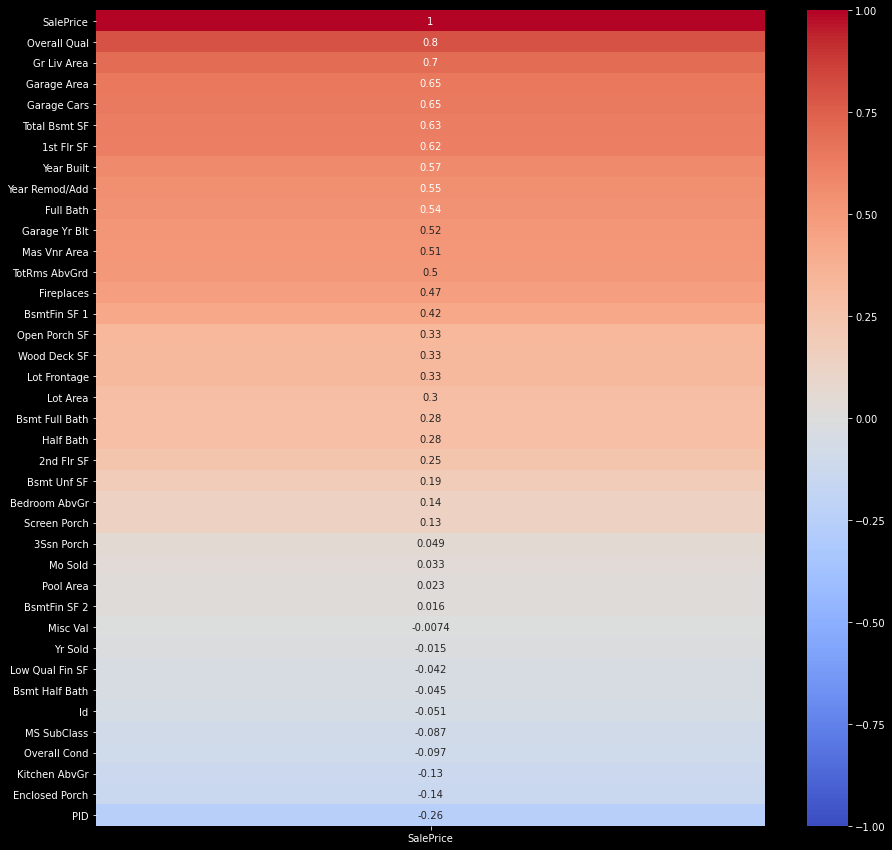

In [823]:
#Relation to price we can see how 
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);
plt.savefig('1.png')


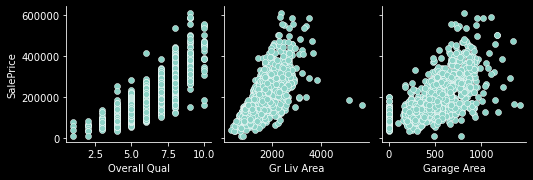

In [824]:
sns.pairplot(df, x_vars = 
             ['Overall Qual','Gr Liv Area','Garage Area'],
             y_vars = ['SalePrice'])
plt.savefig('2.png')

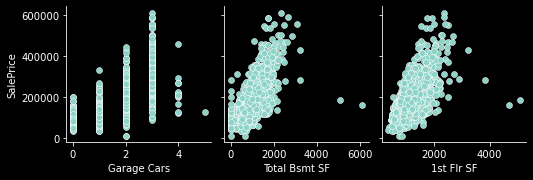

In [825]:
sns.pairplot(df, x_vars = 
             ['Garage Cars','Total Bsmt SF','1st Flr SF'],
             y_vars = ['SalePrice'])
plt.savefig('3.png')

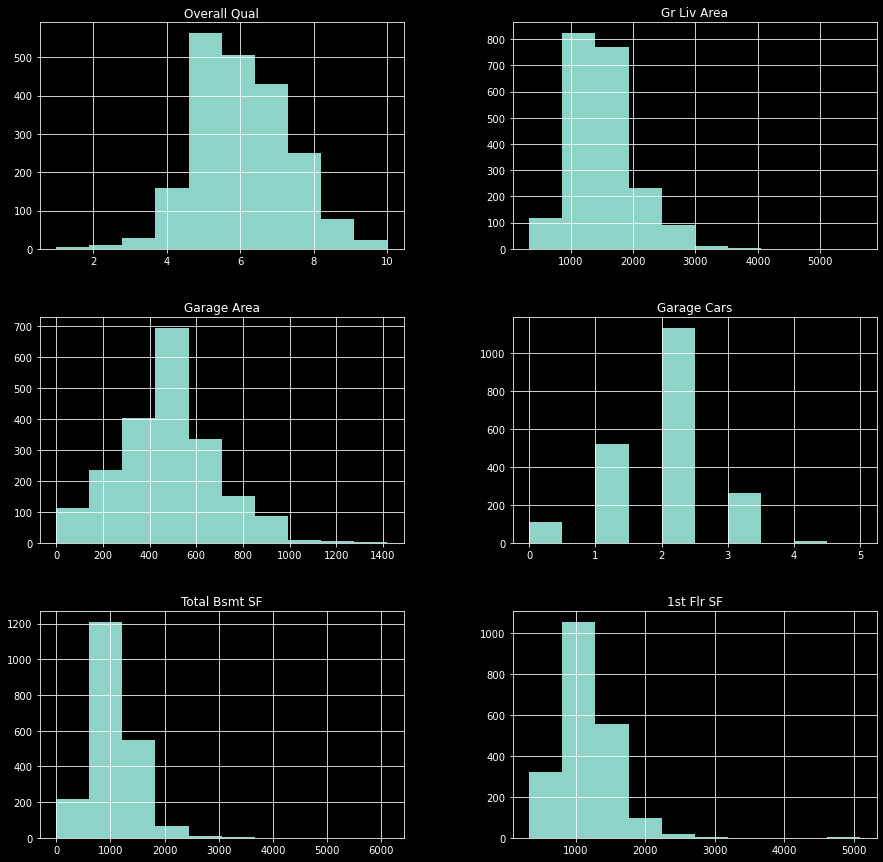

In [826]:
df.hist(column = ['Overall Qual','Gr Liv Area','Garage Area',
                    'Garage Cars','Total Bsmt SF','1st Flr SF',], figsize=(15,15));
plt.savefig('4.png')

In [827]:
#We load up the cleaned test data set
df_test = pd.read_csv('datasets/test_cleaned.csv')

In [828]:
df['SalePrice'].mean()

181469.70160897123

In [829]:
features_cat = ['Bldg Type','House Style']

In [830]:
df = pd.get_dummies(df, columns=features_cat)

In [831]:
df_test = pd.get_dummies(df_test, columns=features_cat)

In [832]:
df_test.fillna(0,inplace=True)#

In [833]:
df.fillna(0,inplace=True)

In [834]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,0,1,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0,0,1,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000,1,0,0,0,0,0,0,1,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000,1,0,0,0,0,0,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500,1,0,0,0,0,1,0,0,0,0,0,0,0


In [852]:
X = df._get_numeric_data().drop(columns = ['SalePrice','Id','PID'])#to get all the features that are numeric
y = df['SalePrice']

In [853]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=.20, random_state=42)

In [854]:
lr = LinearRegression()

In [855]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

In [856]:
#fit model
lr = lr.fit(X_train, y_train)

In [857]:
#score model on train
lr.score(X_train, y_train)

0.8329524185057364

In [858]:
#score model on test
lr.score(X_val, y_val)

0.8639381185145534

In [859]:
#get predictions
preds = lr.predict(X_val)

In [860]:
#r2 score from scikit
r2_score(y_val, preds)

0.8639381185145534

In [861]:
#view coefficients
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

['MS SubClass: -69.06485859411349',
 'Lot Frontage: -67.80975515598544',
 'Lot Area: 0.6735743955195979',
 'Overall Qual: 18063.196342624688',
 'Overall Cond: 3232.365975668514',
 'Year Built: 295.46824844264074',
 'Year Remod/Add: 225.98213791578266',
 'Mas Vnr Area: 39.742444038812515',
 'BsmtFin SF 1: 5.327672284674364',
 'BsmtFin SF 2: -3.686318236860643',
 'Bsmt Unf SF: -6.472928180182862',
 'Total Bsmt SF: 11.274813909940008',
 '1st Flr SF: 15.453991109509843',
 '2nd Flr SF: 20.352709386915194',
 'Low Qual Fin SF: -8.416093293614978',
 'Gr Liv Area: 27.390607198044563',
 'Bsmt Full Bath: 9606.47138063743',
 'Bsmt Half Bath: 1797.6959955308619',
 'Full Bath: 3649.2843394944175',
 'Half Bath: 676.086514265152',
 'Bedroom AbvGr: -7486.160678264046',
 'Kitchen AbvGr: -14786.693323900141',
 'TotRms AbvGrd: 5785.408159864268',
 'Fireplaces: 4215.539183146282',
 'Garage Yr Blt: 105.97558101475465',
 'Garage Cars: 5045.195510779345',
 'Garage Area: 13.172459770396017',
 'Wood Deck SF: 18

In [862]:
#calculate residuals
residuals = y_val - preds

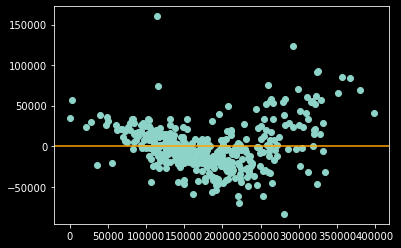

In [863]:
#scatter plot of residuals
plt.scatter(preds, residuals)
plt.axhline(0,color="orange")
plt.savefig('5.png')
#assumptions


In [864]:
X_test = df_test._get_numeric_data().drop(columns = ['Id','PID'])
#to get all the features that are numeric

In [865]:
preds = lr.predict(X_test)
preds = preds.astype(int)
len(preds)

878

In [866]:
preds = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': preds})

In [867]:
preds.shape

(878, 2)

In [1]:
preds.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


NameError: name 'preds' is not defined